In [37]:
import pandas as pd
from os import walk
import matplotlib.pyplot as plt

file_loc = "D:\Data-20231026T061813Z-001\Data\GRF17\GRF17\\"
file_loc_lea = "D:\Data-20231026T061813Z-001\Data\EDGE_GEOCODE_PUBLICLEA_1718\EDGE_GEOCODE_PUBLICLEA_1718\\"

def get_xlsx_files(location):
    """Returns a list of all the excel files in a directory"""
    f = []
    for (dirpath, dirnames, filenames) in walk(location):
        excel_files = [file for file in filenames if ".xlsx" in file and "~$" not in file]
        f.extend(excel_files) 
    return f

def open_and_combine_files(loc, excel_files):
    """Takes list of Files opens as dataframes 
    and returns a combined file
    """
    combined_data = pd.DataFrame()
    for file in excel_files:
        df = pd.read_excel(loc + file)
        combined_data = pd.concat([combined_data, df], ignore_index=True)
    return combined_data

In [24]:
excel_files = get_xlsx_files(file_loc)
excel_files_lea= get_xlsx_files(file_loc_lea)
print(excel_files_lea)

['EDGE_GEOCODE_PUBLICLEA_1718.xlsx']


In [25]:
combined_data = open_and_combine_files(file_loc, excel_files)

In [27]:
combined_data_lea= open_and_combine_files(file_loc_lea, excel_files_lea)
combined_data_lea

,LEAID,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,NMCNTY,...,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,LOCALE,LOC_OTHER,LOC_COUNT,LOC_SCH
0,100002,Alabama Youth Services,1,1000 Industrial School Road,Mt Meigs,AL,36057,1,1073,Jefferson County,...,N,N,106,01044,01020,2017-2018,21,-2.00,-2,N
1,100005,Albertville City,1,107 West Main Street,Albertville,AL,35950,1,1095,Marshall County,...,N,N,104,01026,01009,2017-2018,32,0.00,1,32
2,100006,Marshall County,1,12380 US Highway 431 S,Guntersville,AL,35976,1,1095,Marshall County,...,N,N,104,01034,01009,2017-2018,42,21.02,2,"41, 42"
3,100007,Hoover City,1,2810 Metropolitan Way,Hoover,AL,35243,1,1073,Jefferson County,...,N,N,106,01047,01016,2017-2018,13,5.97,2,"13, 41"
4,100008,Madison City,1,211 Celtic Drive,Madison,AL,35758,1,1089,Madison County,...,N,N,105,01010,01002,2017-2018,21,0.00,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18837,6000030,American Samoa Department of Education,60,Box DOE,Pago Pago,AS,96799,60,60010,Eastern District,...,N,N,6098,N,N,2017-2018,33,6.21,3,"33, 41, 43"
18838,6600002,Guam Department of Education,66,500 Mariner Avenue,Barrigada,GU,96913,66,66010,Guam,...,N,N,6698,N,N,2017-2018,33,10.89,3,"33, 41, 42"
18839,7200030,PUERTO RICO DEPARTMENT OF EDUCATION,72,CALLE FEDERICO COSTAS NUM. 150,HATO REY,PR,919,72,72127,San Juan Municipio,...,N,N,7298,72001,72001,2017-2018,21,52.96,10,"11, 12, 13, 21, 22, 23, 31, 32, 41, 42"
18840,7800002,Saint Croix School District,78,2133 Hospital Street,Saint Croix,VI,820,78,78010,St. Croix Island,...,N,N,7898,N,N,2017-2018,33,0.00,1,33


In [33]:
#Combine the two dataframes by merging 
merged_data = pd.merge(combined_data, combined_data_lea, on='LEAID', how='inner')
#remove duplicates based on 'LEAID' if there are any
merged_data = merged_data.drop_duplicates(subset='LEAID')

In [34]:
print(merged_data)


          LEAID                        NAME_LEA17 AIANNH  NAME_AIANNH17  \
0        100005  Albertville City School District  00000  NOT IN AIANNH   
45       100006   Marshall County School District  00000  NOT IN AIANNH   
160      100007       Hoover City School District  00000  NOT IN AIANNH   
299      100008      Madison City School District  00000  NOT IN AIANNH   
348      100011        Leeds City School District  00000  NOT IN AIANNH   
...         ...                               ...    ...            ...   
730661  5900196                               NaN    NaN            NaN   
730662  5900197                               NaN    NaN            NaN   
730663  5900200                               NaN    NaN            NaN   
730664  6600002                               NaN    NaN            NaN   
730665  7800002                               NaN    NaN            NaN   

        COUNT    LANDAREA  WATERAREA  BLKGRP CBSA_x NAME_CBSA17  ... NECTA_y  \
0         2.0   25.

In [35]:
merged_data.to_csv('merged_data.csv', index=False)

C:\Users\arbaz\AppData\Local\Temp\ipykernel_4668\2701265358.py:5: DtypeWarning: Columns (1,2,3,8,15,17,25,27,28,29,33,36,38,39,41,42,43,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('merged_data.csv')


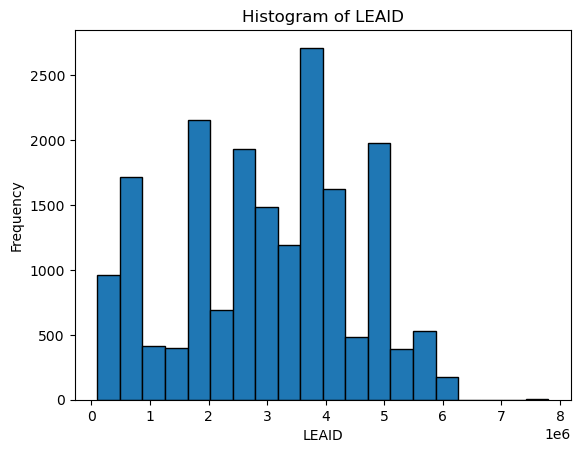

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from the CSV file
data = pd.read_csv('merged_data.csv')

# Extract the column you want to plot as a histogram (e.g., 'LEAID')
column_to_plot = 'LEAID'

# Create a histogram
plt.hist(data[column_to_plot], bins=20, edgecolor='black')

# Add labels and a title
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.title('Histogram of LEAID')

# Show the histogram
plt.show()